In [1]:
from calendar_ipynb.google_oauth import verify_credentials
from calendar_ipynb.events import fetch_events
from calendar_ipynb.ipywidgets.calendar_selection import (
    select_calendars,
    get_selected_calendars,
)
from calendar_ipynb.ipywidgets.date_range_selection import get_selected_date_range
from calendar_ipynb.meta import classify_events

%matplotlib widget
%load_ext autoreload
# Automatically reload all modules
%autoreload 2

EMAIL_IDS = ["fahimalizain@gmail.com", "fahim.zain@kwalee.com"]

for email in EMAIL_IDS:
    verify_credentials(email)

Logging Setup!


INFO:calendar_ipynb.google_oauth:✅ Credentials found for fahimalizain@gmail.com
INFO:calendar_ipynb.google_oauth:✅ Credentials found for fahim.zain@kwalee.com


In [2]:
select_calendars(EMAIL_IDS)
selected_calendars = get_selected_calendars()
if not selected_calendars:
    raise ValueError("No calendars selected")

INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0


In [3]:
from_date, to_date = get_selected_date_range()
if not from_date or not to_date:
    raise ValueError("Please provide from_date and to_date")

print("Date Range:", from_date, " TO ", to_date)

Date Range: 2025-02-17 00:00:00  TO  2025-02-17 23:59:59


In [4]:
events = []
for email, calendars in get_selected_calendars().items():
    for calendar in calendars:
        events.extend(
            fetch_events(
                email=email,
                calendar_id=calendar,
                from_datetime=from_date,
                to_datetime=to_date,
            )
        )
events = classify_events(events)        

INFO:calendar_ipynb.events:Fetching events from 2025-02-17 00:00:00 to 2025-02-17 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-17 00:00:00 to 2025-02-17 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-17 00:00:00 to 2025-02-17 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-17 00:00:00 to 2025-02-17 23:59:59 for fahimalizain@gmail.com
INFO:googleapiclient.discovery_cache:file_cache is only supported with oauth2client<4.0.0
INFO:calendar_ipynb.events:Fetching events from 2025-02-17 00:00:00 to 2025-02-17 23:59:59 for fahim.zain@kwalee.com
INFO:googleapiclient.discovery_cache:file_cache is 

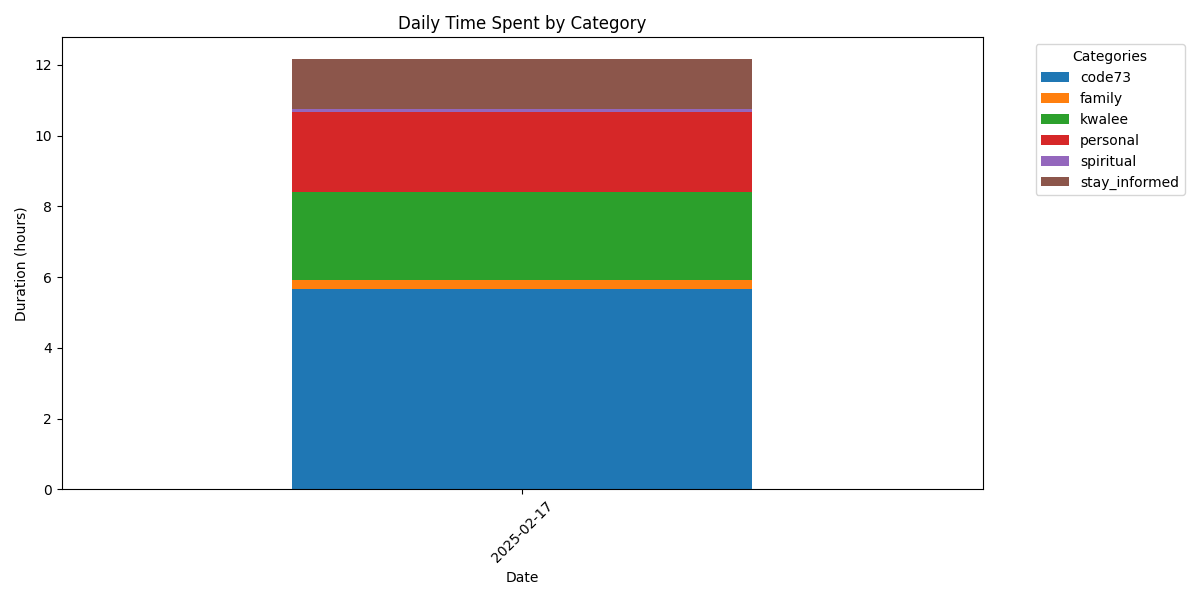

In [5]:
from calendar_ipynb.ipywidgets.bargraph_grouped_by_day import show_bargraph

show_bargraph(events)

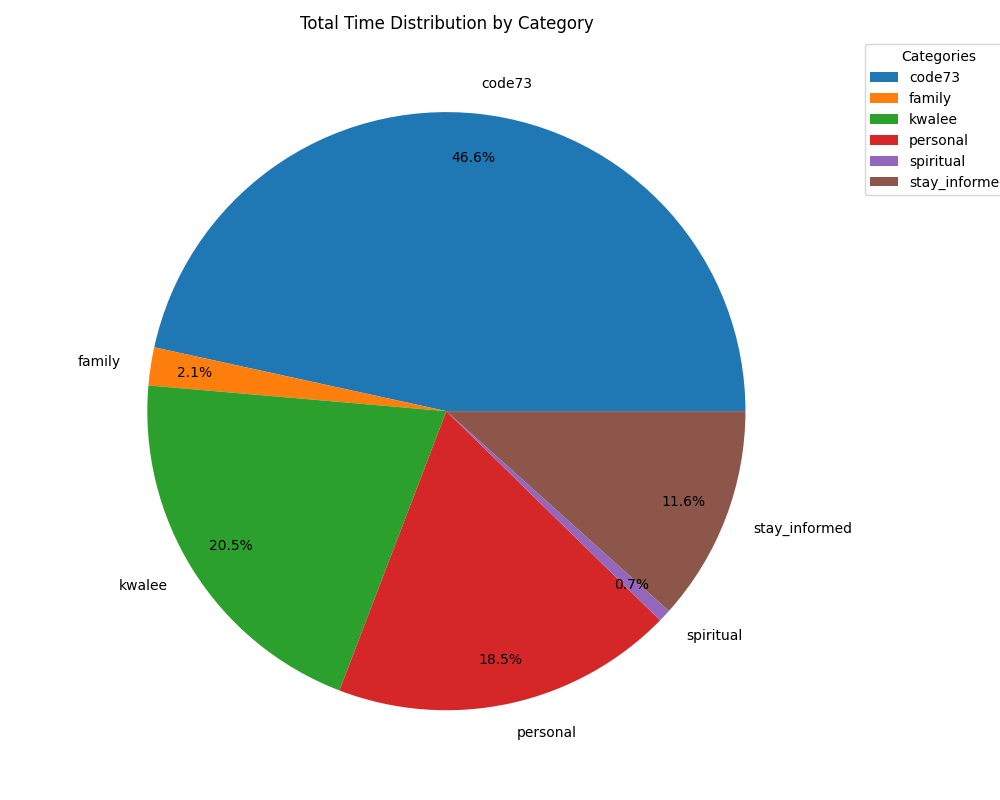

In [6]:
from calendar_ipynb.ipywidgets.piechart import show_piechart

show_piechart(events)